# Data Analysis Project

# A. Overview

This Dataset is a list bank customers who have a credit card with the bank. It suggests whether a credit
card customer is performing good or bad for a bank. It contains 20 features including demographic,
socio-economic and transactional variables for 5050 customers who have an active credit card with
the bank.

Data description: The data contains a 'class' variable where bad=Customers who are not profitable
credit card holders for the bank and Good=Customers who are profitable credit card holders for the
bank. Customer_id is a unique serial number/identifier of each customer. 

In [637]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [638]:
data = pd.read_csv(r"C:\Users\ALPHONSA\OneDrive\Desktop\Assessment-July 2023\Assessment-July 2023\NeoStats - Assessment\Dataset 2.csv")

In [639]:
#default => pd.reset_option(“max_columns”)
pd.set_option('display.max_columns', None)
data.head()

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
3,4,<0,NaN,existing paid,business,605.0,<100,4<=X<7,2,male div/sep,co applicant,4,life insurance,30,none,for free,320,skilled,1.0,none,yes,1296,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad


# B. EDA in Python

## B.1. Examine each variable, summarize the finding and interpret them.

In [640]:
data.head(20)

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
3,4,<0,NaN,existing paid,business,605.0,<100,4<=X<7,2,male div/sep,co applicant,4,life insurance,30,none,for free,320,skilled,1.0,none,yes,1296,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad
5,6,<0,50.0,critical/other existing credit,business,272803999.0,500<=X<1000,4<=X<7,3,male div/sep,co applicant,1,real estate,62,bank,for free,410,high qualif/self emp/mgmt,7.0,none,yes,3218,good
6,7,<0,54.0,critical/other existing credit,business,269.0,<100,<1,1,male div/sep,co applicant,4,real estate,41,stores,own,310,unemp/unskilled non res,5.0,yes,no,-20,bad
7,8,<0,NaN,existing paid,business,999.0,<100,<1,3,male single,co applicant,2,car,24,none,own,410,skilled,13.0,none,no,3527,bad
8,9,<0,19.0,existing paid,business,425.0,<100,<1,4,male div/sep,co applicant,1,life insurance,46,none,own,390,unemp/unskilled non res,12.0,yes,no,1801,good
9,10,<0,33.0,existing paid,business,785.0,<100,<1,1,male div/sep,co applicant,4,no known property,53,stores,own,390,high qualif/self emp/mgmt,1.0,yes,no,2685,good


First of all, let's look at the missing values as we cannot work with data that is not clean.

In [641]:
data.isnull().sum()

Customer_id               0
checking_status           0
duration                  2
credit_history            0
purpose                   0
credit_amount             2
savings_status            5
employment                1
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        1
age                       0
other_payment_plans       0
housing                   8
bureau_score              0
job                       0
num_dependents            7
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

We see that there are a couple of columns with missing values. 

Since the first step is to examine the data, it is better to have a clean data. So, I would like to start off with the second and third questions in B. i.e... B.2 and B.3

----

## B.2. Do you see any outlier in any of the 22 variables? How will you treat them? 

Let's begin with the first numerical column itself, 'duration'.

<AxesSubplot:>

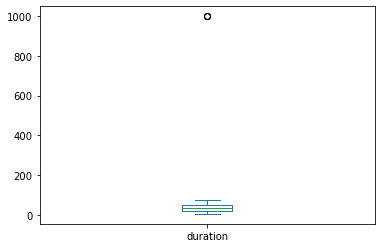

In [642]:
data.duration.plot.box()

In [643]:
data[data.duration > 200]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
69,70,<0,999.0,no credits/all paid,domestic appliance,417.0,500<=X<1000,<1,2,male mar/wid,guarantor,2,real estate,66,stores,own,480,skilled,3.0,yes,yes,1994,bad
98,99,<0,999.0,existing paid,education,27623.0,<100,NaN,2,male div/sep,guarantor,1,NaN,38,none,for free,60,unskilled resident,1.0,yes,no,3317,good
102,103,<0,999.0,all paid,education,1198.0,<100,>=7,4,female div/dep/mar,none,4,no known property,35,none,for free,10,skilled,1.0,none,yes,543,bad


In [644]:
data = data[data.duration < 200]

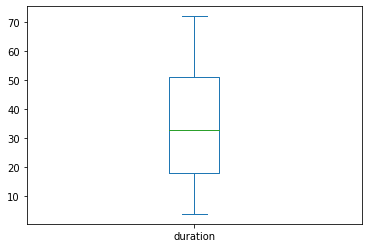

In [645]:
data.duration.plot.box()
plt.show()

'duration' had outliers, but we managed to clear them.

Let's go to the next one, 'credit_amount'.

<AxesSubplot:>

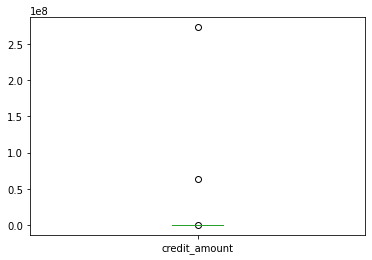

In [646]:
data.credit_amount.plot.box()

In [647]:
data.credit_amount.mean()

73011.80983541542

In [648]:
data.credit_amount.min()

250.0

In [649]:
data.credit_amount.max()

272803999.0

In [650]:
data[data.credit_amount > 20000]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
5,6,<0,50.0,critical/other existing credit,business,272803999.0,500<=X<1000,4<=X<7,3,male div/sep,co applicant,1,real estate,62,bank,for free,410,high qualif/self emp/mgmt,7.0,none,yes,3218,good
60,61,<0,64.0,existing paid,domestic appliance,63836521.0,500<=X<1000,4<=X<7,4,male div/sep,co applicant,3,real estate,37,none,rent,30,unemp/unskilled non res,4.0,none,no,429,bad
68,69,<0,51.0,existing paid,domestic appliance,27601.0,no known savings,<1,4,male single,guarantor,3,car,67,bank,own,210,skilled,8.0,yes,no,2761,bad


Initially, I couldn't make out the outliers with the help of a box plot. Therefore, after a bit of trial and error, we managed to find the cut-off for the credit_amount. It is 20,000 and above.

In [651]:
data = data[data.credit_amount < 20000]

<AxesSubplot:>

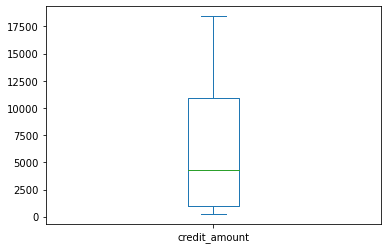

In [652]:
data.credit_amount.plot.box()

'credit_amount’ also had outliers, we managed to clear them.

Onto the next one, 'installment_commitment'.

In [653]:
data.head()

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad
6,7,<0,54.0,critical/other existing credit,business,269.0,<100,<1,1,male div/sep,co applicant,4,real estate,41,stores,own,310,unemp/unskilled non res,5.0,yes,no,-20,bad


<AxesSubplot:>

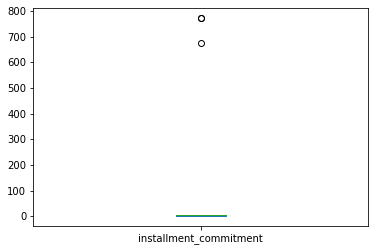

In [654]:
data.installment_commitment.plot.box()

In [655]:
data.shape

(5040, 23)

In [656]:
data[data.installment_commitment > 5]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
62,63,<0,48.0,existing paid,domestic appliance,307.0,100<=X<500,unemployed,772,male single,co applicant,2,real estate,52,stores,rent,100,unemp/unskilled non res,6.0,none,no,1164,good
76,77,<0,60.0,critical/other existing credit,domestic appliance,885.0,<100,1<=X<4,772,male mar/wid,none,1,real estate,70,stores,for free,250,high qualif/self emp/mgmt,13.0,none,yes,4976,bad
1206,1207,>=200,20.0,all paid,education,5511.0,<100,1<=X<4,674,male div/sep,none,3,life insurance,43,stores,own,280,unskilled resident,13.0,none,yes,1813,good


In [657]:
data = data[data.installment_commitment < 5]

<AxesSubplot:>

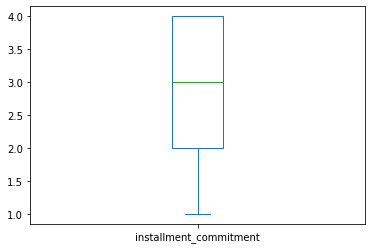

In [658]:
data.installment_commitment.plot.box()

‘installment_commitment’ had outliers. We managed to plot them on a box plot, which revealed the outliers. Then, cleared them.

The next one is 'residence_since'.

In [659]:
data.head()

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad
6,7,<0,54.0,critical/other existing credit,business,269.0,<100,<1,1,male div/sep,co applicant,4,real estate,41,stores,own,310,unemp/unskilled non res,5.0,yes,no,-20,bad


<AxesSubplot:>

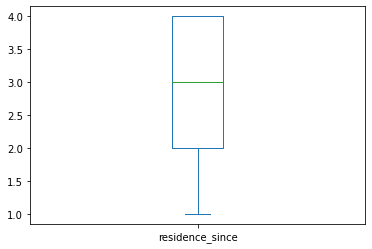

In [660]:
data.residence_since.plot.box()

'residence_since' doesn't have outliers. Next one, 'age'.

In [661]:
data.head()

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad
6,7,<0,54.0,critical/other existing credit,business,269.0,<100,<1,1,male div/sep,co applicant,4,real estate,41,stores,own,310,unemp/unskilled non res,5.0,yes,no,-20,bad


<AxesSubplot:>

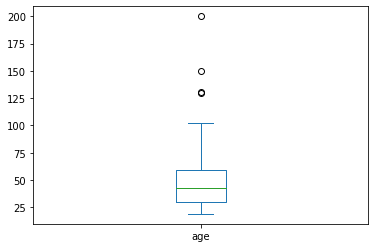

In [662]:
data.age.plot.box()

In [663]:
data[data.age > 100]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
4936,4937,no checking,64.0,critical/other existing credit,used car,609.0,>=1000,<1,4,male mar/wid,guarantor,2,life insurance,200,stores,own,120,high qualif/self emp/mgmt,12.0,none,yes,3604,bad
4999,5000,no checking,18.0,critical/other existing credit,used car,3229.0,no known savings,unemployed,2,male single,none,4,no known property,131,none,own,10,high qualif/self emp/mgmt,1.0,yes,yes,4316,good
5008,5009,no checking,39.0,existing paid,used car,2569.0,500<=X<1000,1<=X<4,4,male single,none,4,car,130,none,own,10,skilled,1.0,none,yes,151,good
5021,5022,no checking,24.0,critical/other existing credit,used car,4042.0,no known savings,4<=X<7,3,male single,none,4,life insurance,150,none,own,20,skilled,1.0,yes,yes,3876,good
5032,5033,no checking,39.0,all paid,used car,10949.0,<100,4<=X<7,2,male single,none,3,life insurance,102,bank,rent,300,unskilled resident,13.0,none,no,3202,good


I have heard of a few people who might have lived up to 102 years. But the very next is 130. I have never heard of that. We can confirm that everything above 102 is definitely an outlier.

In [664]:
data[data.age > 110]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
4936,4937,no checking,64.0,critical/other existing credit,used car,609.0,>=1000,<1,4,male mar/wid,guarantor,2,life insurance,200,stores,own,120,high qualif/self emp/mgmt,12.0,none,yes,3604,bad
4999,5000,no checking,18.0,critical/other existing credit,used car,3229.0,no known savings,unemployed,2,male single,none,4,no known property,131,none,own,10,high qualif/self emp/mgmt,1.0,yes,yes,4316,good
5008,5009,no checking,39.0,existing paid,used car,2569.0,500<=X<1000,1<=X<4,4,male single,none,4,car,130,none,own,10,skilled,1.0,none,yes,151,good
5021,5022,no checking,24.0,critical/other existing credit,used car,4042.0,no known savings,4<=X<7,3,male single,none,4,life insurance,150,none,own,20,skilled,1.0,yes,yes,3876,good


In [665]:
data = data[data.age < 110]

<AxesSubplot:>

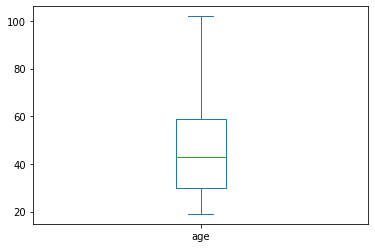

In [666]:
data.age.plot.box()

‘age’ had outliers. They were revealed when ‘age’ was out on a box plot. Then, the outliers were removed. 

Next is 'bureau_score'.

In [667]:
data.head()

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad
6,7,<0,54.0,critical/other existing credit,business,269.0,<100,<1,1,male div/sep,co applicant,4,real estate,41,stores,own,310,unemp/unskilled non res,5.0,yes,no,-20,bad


<AxesSubplot:>

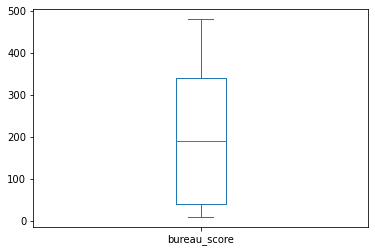

In [668]:
data.bureau_score.plot.box()

'bureau_score' doesn't seem to have any outlier.

Let's look at 'num_dependents'.

In [669]:
data.head()

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad
6,7,<0,54.0,critical/other existing credit,business,269.0,<100,<1,1,male div/sep,co applicant,4,real estate,41,stores,own,310,unemp/unskilled non res,5.0,yes,no,-20,bad


<AxesSubplot:>

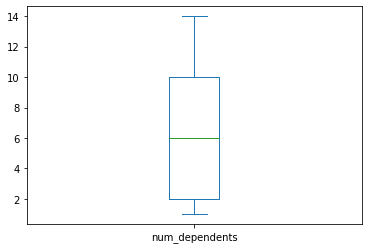

In [670]:
data.num_dependents.plot.box()

'num_dependents' doesn't have outliers as well.

Let's check out 'Spend_debit_card'.

In [671]:
data.head()

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad
6,7,<0,54.0,critical/other existing credit,business,269.0,<100,<1,1,male div/sep,co applicant,4,real estate,41,stores,own,310,unemp/unskilled non res,5.0,yes,no,-20,bad


<AxesSubplot:>

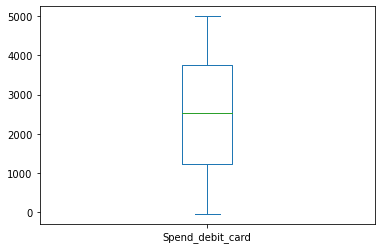

In [672]:
data.Spend_debit_card.plot.box()

'Spend_debit_card' doesn't have outliers.

## Outliers Cleared!

## B.3. Do you see any missing values in any of the 22 variables? How will you treat them?

In [673]:
data.columns[data.isnull().sum() > 0]

Index(['savings_status', 'housing', 'num_dependents'], dtype='object')

We see that there are three columns with null values. Let's use three different methods to clean 'em up.
* Fill the null values with the most common value.
* Fill the null values with the value that comes directly beneath the null value.
* Fill the null values with the mean of the column.

---------------------------

### Method I - Filling the null values with the most common value.

In [674]:
data[data.savings_status.isnull()]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
73,74,<0,66.0,existing paid,domestic appliance,496.0,NaN,1<=X<4,4,male div/sep,guarantor,2,car,68,stores,rent,170,unskilled resident,9.0,none,yes,3915,bad
84,85,<0,34.0,existing paid,domestic appliance,455.0,NaN,<1,3,male div/sep,none,1,real estate,74,stores,rent,320,high qualif/self emp/mgmt,5.0,none,no,1066,good
87,88,<0,21.0,existing paid,education,698.0,NaN,4<=X<7,1,male div/sep,co applicant,2,real estate,58,bank,own,470,unskilled resident,8.0,yes,yes,2137,bad
91,92,<0,72.0,existing paid,education,257.0,NaN,1<=X<4,3,male div/sep,co applicant,3,life insurance,75,stores,rent,100,skilled,10.0,yes,yes,596,good
115,116,<0,36.0,critical/other existing credit,education,8065.0,NaN,1<=X<4,3,female div/dep/mar,none,2,no known property,25,none,own,20,high qualif/self emp/mgmt,1.0,yes,yes,1209,bad


In [675]:
data.savings_status.value_counts()

<100                1779
500<=X<1000         1353
100<=X<500           837
>=1000               710
no known savings     349
Name: savings_status, dtype: int64

In [676]:
a = data.savings_status.mode()[0]
a

'<100'

In [677]:
data.savings_status = data.savings_status.fillna(a)

In [678]:
data.savings_status.value_counts()

<100                1784
500<=X<1000         1353
100<=X<500           837
>=1000               710
no known savings     349
Name: savings_status, dtype: int64

Here, we can clearly see that 5 values have increased for the most common value. We did this because, it is always better to avoid dropping columns as we might lose some data we might need later. When we fill the null values with the most common value, it doesn't affect the analysis much either.

Let's go to the next one, 'housing'.

Here, we fill the null values with the value that comes directly beneath the null value. This could give a little more logical sense to the data.

----

### Method II - Filling the null values with the value directly beneath.

In [679]:
data[data.housing.isnull()]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
4856,4857,no checking,43.0,all paid,retraining,5251.0,>=1000,>=7,1,male div/sep,none,2,no known property,52,none,NaN,90,unemp/unskilled non res,1.0,yes,no,1309,good
4914,4915,no checking,59.0,delayed previously,used car,557.0,<100,>=7,2,male div/sep,co applicant,4,life insurance,21,stores,NaN,140,unemp/unskilled non res,1.0,yes,no,1797,good
4943,4944,no checking,17.0,critical/other existing credit,used car,831.0,100<=X<500,>=7,1,male div/sep,guarantor,1,no known property,56,none,NaN,120,skilled,7.0,none,no,984,bad
4966,4967,no checking,9.0,critical/other existing credit,used car,15731.0,>=1000,unemployed,1,male div/sep,none,2,life insurance,29,stores,NaN,150,high qualif/self emp/mgmt,14.0,none,no,2909,bad
4998,4999,no checking,15.0,existing paid,used car,3812.0,100<=X<500,<1,1,female div/dep/mar,none,4,car,23,none,NaN,10,skilled,1.0,yes,yes,4156,good
5018,5019,no checking,48.0,critical/other existing credit,used car,2751.0,no known savings,>=7,4,male single,none,3,car,38,none,NaN,20,skilled,2.0,yes,yes,4247,good
5033,5034,no checking,12.0,existing paid,used car,2445.0,no known savings,<1,2,male mar/wid,none,4,car,26,none,NaN,10,skilled,1.0,yes,yes,410,good
5047,5048,no checking,42.0,critical/other existing credit,used car,17037.0,500<=X<1000,4<=X<7,1,male single,none,4,no known property,45,none,NaN,450,unskilled resident,14.0,yes,no,3386,good


In [680]:
data.housing = data.housing.fillna(method = 'bfill').fillna(0)
#subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

In [681]:
data.housing.isnull().sum()

0

We have cleaned the 'housing' column as well.

The next one is 'num_dependents', let's clean up that as well.

Here, we fill the null values with the mean of the column.

----

### Method III - Filling the null values with the mean of the column.

In [682]:
data[data.num_dependents.isnull()]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
96,97,<0,19.0,critical/other existing credit,education,412.0,<100,<1,2,male div/sep,guarantor,3,real estate,30,stores,for free,300,high qualif/self emp/mgmt,NaN,none,yes,647,good
108,109,<0,48.0,existing paid,education,7476.0,<100,4<=X<7,4,male single,none,1,no known property,50,none,for free,10,high qualif/self emp/mgmt,NaN,yes,yes,3138,good
120,121,<0,48.0,all paid,education,662.0,<100,>=7,1,male div/sep,none,2,real estate,65,stores,own,50,skilled,NaN,none,no,481,good
191,192,<0,6.0,existing paid,furniture/equipment,1374.0,<100,1<=X<4,1,male single,none,2,real estate,36,bank,own,10,unskilled resident,NaN,yes,yes,999,good
243,244,<0,12.0,critical/other existing credit,new car,3499.0,<100,1<=X<4,3,female div/dep/mar,co applicant,2,real estate,29,none,own,20,skilled,NaN,none,yes,2239,good
266,267,<0,36.0,existing paid,new car,697.0,100<=X<500,<1,4,male single,guarantor,2,no known property,34,none,rent,170,unemp/unskilled non res,NaN,yes,no,1131,good
310,311,<0,6.0,critical/other existing credit,new car,609.0,<100,4<=X<7,4,female div/dep/mar,none,3,life insurance,37,none,own,20,skilled,NaN,none,no,2575,good


In [683]:
data.num_dependents.mean()

6.245523278949463

Though the mean is 6.24, let's round it off and take 6.0 as the mean because none of the other values in the column have anything other than 0 in the decimal values.

In [684]:
data.num_dependents = data.num_dependents.fillna(6.0)

In [685]:
data.num_dependents.isnull().sum()

0

Now that we have filled up the null values with 6.0, let's look at the mean of the data.

In [686]:
data.num_dependents.mean()

6.245181800119213

The mean of the column is still 6.24, so we can say that this is a successful clean-up.

In [687]:
data.isnull().sum()

Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

Et Voila! The cleaning is done. There are no more null values in the data!

Now, let's head back to the first question.

## Data Cleaning DONE!

## B.1. Examine each variable, summarize the finding and interpret them.

### Let's try and find the correlation between the variables. I will be using two methods:
* Correlation Matrix.
* Chi-Square Test.

### I. Correlation Matrix.

In [688]:
df = data.copy()

In [690]:
from scipy.stats.stats import pearsonr

for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
        

for col in df.columns[1:]:
    for col1 in df.columns[1:]:
            a = pearsonr(df[col].values, df[col1].values)
#             if ((a[0] > 0.3) & (a[0] < 0.6)):
            if ((a[0] > 0.3) & (col != col1)):
                print(a)
                print(col, col1)
#         print("0", col, "1", col1)
#     print(col)
# pearsonr(data.duration, data.credit_amount)

(0.3424116312754836, 1.8879314110390318e-138)
bureau_score num_dependents
(0.3424116312754836, 1.8879314110390318e-138)
num_dependents bureau_score


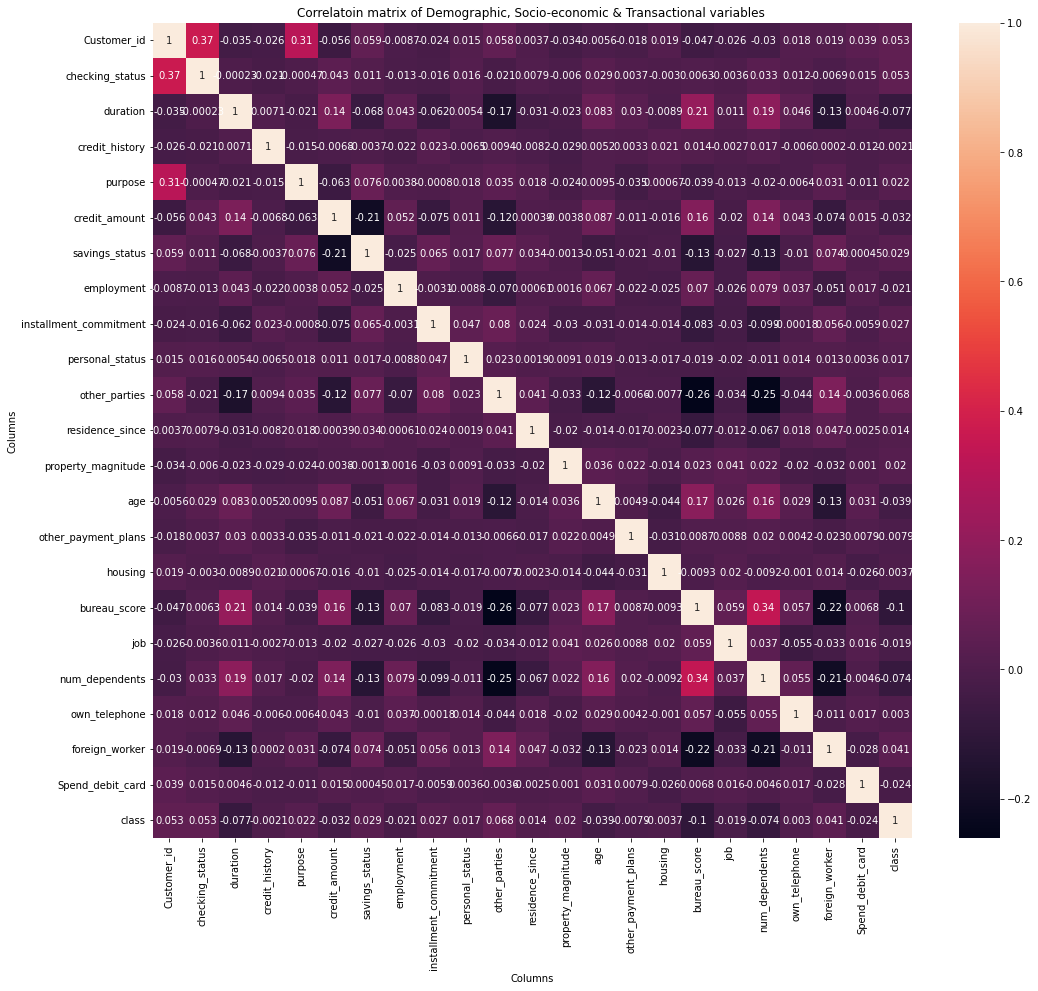

In [693]:
plt.figure(figsize = [17,15])
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlatoin matrix of Demographic, Socio-economic & Transactional variables ')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()

We tried to find a correlation between the variables but it turns out that none of the variables are correlated.

We used the pearsonr() function imported from scipy.stats.stats, and according to that funtion we just have to pass the variables to the function. 
* Example: pearsonr(x, y)
* Output will be: (int1, int2)

The output is interpretted as follows:
* int1 = Pearson correlation coefficient (r).
* int2 = Two-tailed p-value.

For a strong or positive correlation to exist between two variables, the Pearson correlation coefficient should be at least 0.75 or more. And we do not get that between any two variables. The closest we have has been displayed above, it is 0.3424116312754836, but unofortunately that is nowhere near enough to establish a strong correlation. PS: There were a couple of values with the Pearson correlation coefficient more than 0.75, but that happened when the variables were checked against each other. Hence, the condition if(col != col1).

I have also used a heatmap for a more clear and graphical representation of the correlation.

----

### 2. Chi-Square Test.

In [880]:
chi_sq_df = df.copy()

In [909]:
from sklearn.feature_selection import chi2

chi_matrix = pd.DataFrame(data = 
                         [(0 for i in range(len(chi_sq_df.columns))) 
                          for i in range(len(chi_sq_df.columns))], 
                         columns = list(chi_sq_df.columns))

chi_matrix.set_index(pd.Index(list(chi_sq_df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(chi_sq_df.columns):
    for j in list(chi_sq_df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(chi_sq_df[i]).reshape(-1, 1), np.array(chi_sq_df[j]).reshape(-1, 1))
            chi_matrix.loc[i,j] = p_val
print(chi_matrix)

                             duration  credit_history        purpose  \
duration                 0.000000e+00    0.000000e+00   0.000000e+00   
credit_history           9.983764e-01    0.000000e+00   1.352647e-01   
purpose                  3.353225e-08    1.105024e-18   0.000000e+00   
credit_amount            0.000000e+00    0.000000e+00   0.000000e+00   
savings_status           1.436318e-04    5.823785e-43   4.447625e-11   
employment               2.069825e-02    2.905450e-04   8.339865e-08   
installment_commitment   9.397000e-03    3.394717e-03   4.257300e-07   
personal_status          9.995406e-01    8.944806e-01   1.065432e-01   
other_parties            1.745766e-29    1.913797e-19   1.978975e-31   
residence_since          9.402647e-01    2.512428e-02   9.041369e-01   
property_magnitude       2.146643e-02    4.004408e-01   1.458358e-01   
age                     6.591875e-282   4.743936e-106  6.357434e-260   
other_payment_plans      5.681219e-01    7.272950e-01   4.160467

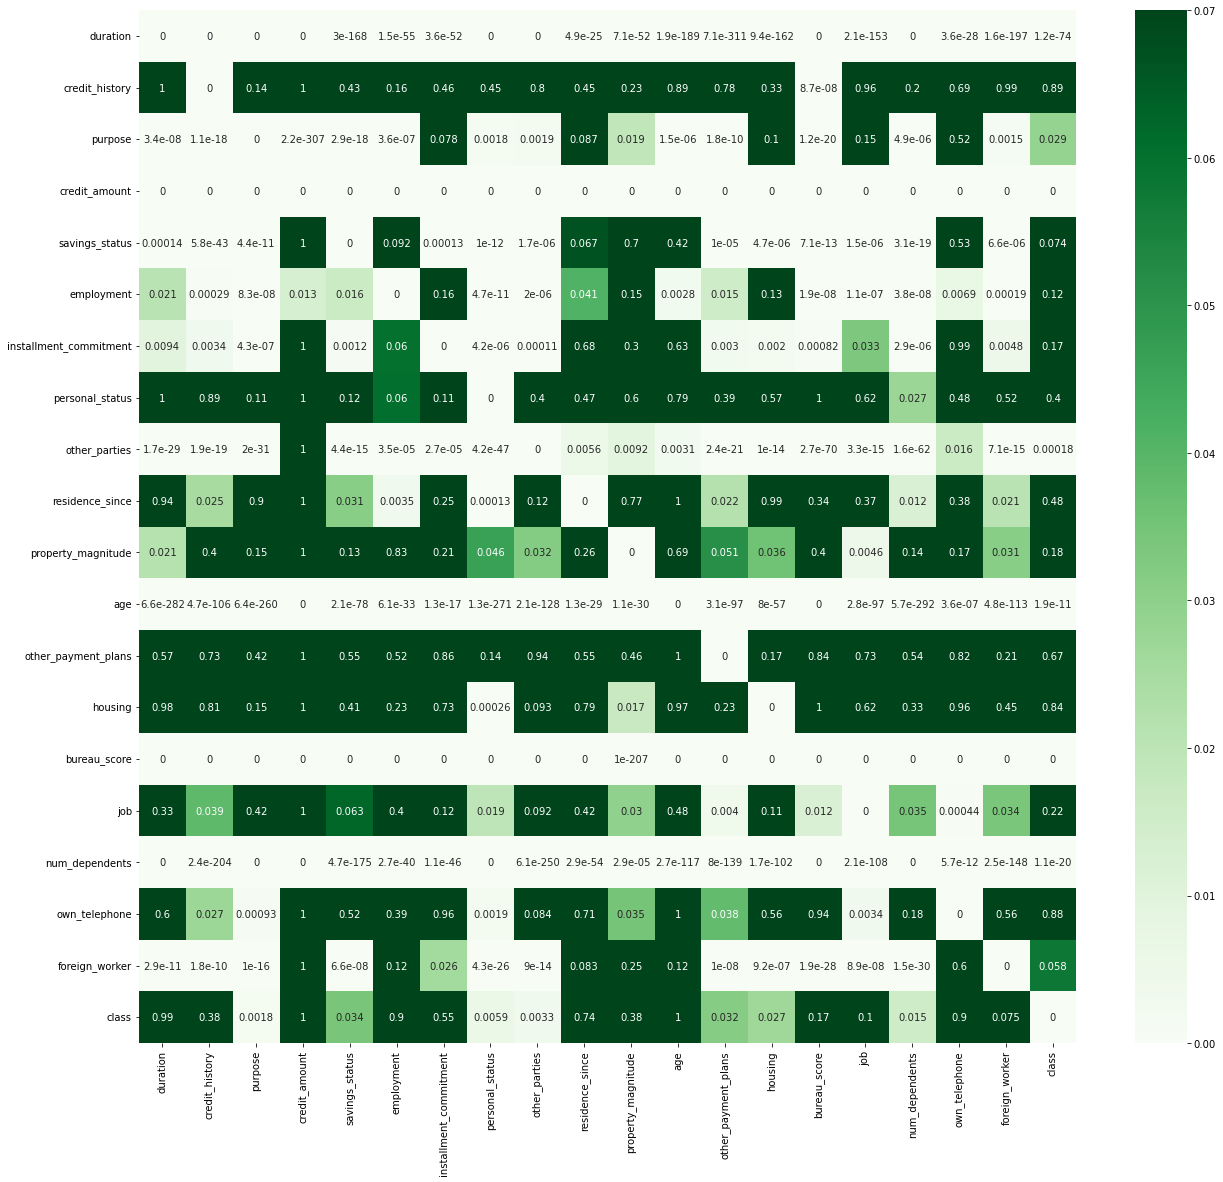

In [921]:
fig = plt.figure(figsize = (21,19))
sns.heatmap(chi_matrix, annot = True, cmap = 'Greens', vmin = 0, vmax = 0.07)
plt.show()

With the Chi-Square Test Method we tried to find out the correlation between the variables.

According to Chi-Square Test, two variables are said to be well correlated if their p-values are lesser than 0.05. From the heatmap above we can see that quite a lot of variables are correlated. I have adjusted the 'vmin' and 'vmax' attributes of the heatmap to make the correlated variables stand out from the heatmap.

Let's look at a few of them:

* Row2('credit_history'): 'credit_history' is well correlated with 'bureau_score' as it should be. This makes sense. If your credit history is good, eventually your bureau score will be good.
* Row3('purpose'): 'purpose' is well correlated with almost all the variables. The highest among them are 'num_dependents' & 'employment'. This means that if have a well-paying job, you can afford the credit card. Which could lead to a number of dependents.
* Row5('savings_status'): 'savings_status' is well correlated with 'bureau_score'. This means that if you are a person who has a habit of saving money, you can end up having a good 'bureau_score' as you will have the tendency to close the credit rather than spending unnecessarily.
* Row7('installment_commitment'): 'installment_commitment' is well correlated with 'num_dependents'. This means that if the number of dependents on your card are more, the higher the chances are that you could have more installment commitments.
* Row19('foreign_worker'): We can see that 'foreign_worker' is well correlated with job. This also makes sense, because if you look at countries like GCC Countries, Asian, etc... they prefer more foriegn workers than their own.

----

## C. Modeling in Python.

## I'm going to use three models here.
* Decision Tree Model.
* Random Forest Model.
* Ordinally Encoded Model.

### Decision Tree Model.

In [800]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

features = ['duration','credit_amount','installment_commitment','residence_since','age','num_dependents']
x = data[features]
y = data.bureau_score

dt_model = DecisionTreeRegressor(random_state = 0)
dt_model.fit(x, y)
dt_prediction = dt_model.predict(x)
mae = mean_absolute_error(y, dt_prediction)
mae

0.0

Wow! No margin of error at all!

Now, let's involve the data that wasn't used in building the model. Let's take the part of the data that wasn't used in building the model.

In [696]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)
dt_model1 = DecisionTreeRegressor(random_state = 0)
dt_model1.fit(train_x, train_y)
dt_prediction = dt_model1.predict(val_x)
mae = mean_absolute_error(val_y, dt_prediction)
mae

136.77521842732327

We can see that the Decision Tree Model for this problem is Overfit because there is no error at all when the model uses just the training data, but once we included the validation data we can see that the mean_absolute_error is not 0, but 136.78.

Overfitting usually occurs, because the tree might not have had a lot of leaves. So, let's try and find the right number of leaf nodes for the model.

First, let's write a function to get the Mean Absolute Error and put it in a loop of a few numbers to try and identify the best number of leaf nodes.

In [697]:
def dt_mae(leaf_nodes, train_x, val_x, train_y, val_y):
    dt_model2 = DecisionTreeRegressor(max_leaf_nodes = leaf_nodes, random_state = 0)
    dt_model2.fit(train_x, train_y)
    dt2_prediction = dt_model2.predict(val_x)
    mae = mean_absolute_error(val_y, dt2_prediction)
    return(mae)

In [698]:
for leaf_nodes in [10, 20, 30, 40, 50]:
    loop_mae = dt_mae(leaf_nodes, train_x, val_x, train_y, val_y)
    print('Number of leaf nodes:', leaf_nodes)
    print('Mean Absolute Error:', loop_mae)

Number of leaf nodes: 10
Mean Absolute Error: 108.17683579214791
Number of leaf nodes: 20
Mean Absolute Error: 104.59690875627379
Number of leaf nodes: 30
Mean Absolute Error: 104.97241617679624
Number of leaf nodes: 40
Mean Absolute Error: 105.38481131224883
Number of leaf nodes: 50
Mean Absolute Error: 105.07549928735544


Now, that we have the value close to the best possible number of leaf nodes, let's put that into the function.

In [699]:
dt_mae(20, train_x, val_x, train_y, val_y)

104.59690875627379

----

### Random Forest Model.

Lets's make try using Random Forest Model to determine the 'bureau_score'.

In [700]:
from sklearn.ensemble import RandomForestRegressor

r_model = RandomForestRegressor(random_state = 0)
r_model.fit(x, y)
r_prediction = r_model.predict(x)
mae = mean_absolute_error(r_prediction, y)
mae

39.12497516391814

In [701]:
r_model.fit(train_x, train_y)
r_prediction = r_model.predict(val_x)
mae = mean_absolute_error(r_prediction, val_y)
mae

106.88435266084193

In [702]:
def r_mae(estimators, t_x = train_x, v_x = val_x, t_y = train_y, v_y = val_y):
    r_model1 = RandomForestRegressor(n_estimators = estimators, random_state = 0)
    r_model1.fit(t_x, t_y)
    r_prediction1 = r_model1.predict(v_x)
    mae = mean_absolute_error(r_prediction1, v_y)
    return(mae)

In [703]:
for estimators in [100, 200, 300, 400]:
    loop_r = r_mae(estimators)
    print('Number of Estimators:', estimators)
    print('Mean Absolute Error:', loop_r)

Number of Estimators: 100
Mean Absolute Error: 106.88435266084193
Number of Estimators: 200
Mean Absolute Error: 106.33328038125497
Number of Estimators: 300
Mean Absolute Error: 106.16341011384696
Number of Estimators: 400
Mean Absolute Error: 106.17754169976173


Since the default value of 'n_estimators' is 100 and the Mean Absolute Error of the multiples of 100 are close, let's finalize the value of the 'n_estimators' to be default itself, i.e... 100!

In [704]:
r_mae(100)

106.88435266084193

We can see that the Random Forest Model seems Under fit before using the Validation data. After the Validation data also has been included in the model, it has a better Mean Absolute Error than Decision Tree.

Decision Tree Model MAE = 136.
Random Forest Model MAE = 106.

----

### Ordinally Encoded Model.

In [808]:
X = data.copy()

In [809]:
Y = X.bureau_score
X.drop(['bureau_score'], axis = 1, inplace = True)

X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, random_state = 0)

In [815]:
# Taking the categorical values in the data.
object_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
# Choosing the columns that can be safely Ordinal Encoded.
good_columns = [col for col in object_cols if set(X_valid[col]).issubset(set(X_train[col]))]
# Store the columns that we cannot use in another variable so that we can remove those columns.
bad_columns = list(set(object_cols) - set(good_columns))

Then, we drop the columns we cannot use.

In [812]:
label_X_train = X_train.drop(bad_columns, axis = 1)
label_X_valid = X_valid.drop(bad_columns, axis = 1)

In [813]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
label_X_train[good_columns] = ordinal_encoder.fit_transform(X_train[good_columns])
label_X_valid[good_columns] = ordinal_encoder.transform(X_valid[good_columns])

In [814]:
oe_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
oe_model.fit(label_X_train, Y_train)
oe_prediction = oe_model.predict(label_X_valid)
mae = mean_absolute_error(oe_prediction, Y_valid)
mae

102.0969023034154

The Mean Absolute Error is 102! This is the really close to 0. We can use this model furthermore as well.

----

### Mean Absolute Error using:

* Decision Tree: 136.
* Random Forest: 106.
* Ordinal Encoding: 102.

### I think it's safe to say that the Ordinally encoded model is optimal!

### The most important variables are:
* 'class'
* 'credit_history'.
* 'bureau_score'.
* 'purpose'.
* 'num_dependents', etc...

The above conclusion is as per my analysis with the Chi-Square Test.

### The most important of all would be 'bureau_score', this is because if you have a bad bureau score, you are less likely to even get a credit card to begin with.


----
----

## Thank you.